<h3>1D Convolutional Neural Network</h3>

Convolutional neural networks (CNNs) are typically used for image processing, but 1D CNNs are great for pattern detection in time-series data.  The convolutional layers will slide filters over the flux values to detect patterns, such as changes in brightness.

---

In [1]:
import numpy as np

# Load preprocessed data
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GlobalAveragePooling1D, Dense

# Define the CNN model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # Input Layer
    Conv1D(filters=32, kernel_size=5, activation="relu"), # Detects patterns in input data
    BatchNormalization(), # Stabalizes training by normalizing activations
    Dropout(0.3), # Reduces overfitting

    Conv1D(filters=64, kernel_size=5, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=5, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    GlobalAveragePooling1D(), # Reduces dimensionality while keeping key info

    Dense(64, activation="relu"), # Fully connected layer for classification
    Dropout(0.3),

    Dense(2, activation="softmax") # Outputs two classifications
])

# Compile the model
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 3193, 32)            │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3193, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3193, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 3189, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3189, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3189, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 3185, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3185, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3185, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,866 (237.76 KB)

 Trainable params: 60,418 (236.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [3]:
# Convert labels from {1, 2} to {0, 1}
y_train = y_train - 1
y_test = y_test - 1

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30, batch_size=32, verbose=1
)

Epoch 1/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 91s 283ms/step - accuracy: 0.5530 - loss: 0.6987 - val_accuracy: 0.9877 - val_loss: 0.4527
Epoch 2/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 104s 328ms/step - accuracy: 0.6009 - loss: 0.6602 - val_accuracy: 0.1088 - val_loss: 0.9997
Epoch 3/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 100s 317ms/step - accuracy: 0.6193 - loss: 0.6404 - val_accuracy: 0.1281 - val_loss: 1.4296
Epoch 4/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 116s 367ms/step - accuracy: 0.6600 - loss: 0.6102 - val_accuracy: 0.0947 - val_loss: 1.9387
Epoch 5/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 122s 386ms/step - accuracy: 0.6674 - loss: 0.5992 - val_accuracy: 0.1684 - val_loss: 1.2264
Epoch 6/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 127s 402ms/step - accuracy: 0.6827 - loss: 0.5793 - val_accuracy: 0.0912 - val_loss: 2.3471
Epoch 7/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 123s 389ms/step - accuracy: 0.6941 - loss: 0.5693 - val_accuracy: 0.0526 - val_loss: 5.4331
Epoch 8/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 127s 401ms/step - accuracy: 0.7140 - 

In [4]:
from sklearn.metrics import classification_report

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predicted class labels (chooses the highest probability)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Selects class with highest probability

# Generate classification report
print(classification_report(y_test, y_pred_classes))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5292 - loss: 0.6158
Test Accuracy: 0.5333
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step 
              precision    recall  f1-score   support

           0       0.99      0.54      0.69       565
           1       0.00      0.20      0.01         5

    accuracy                           0.53       570
   macro avg       0.50      0.37      0.35       570
weighted avg       0.98      0.53      0.69       570



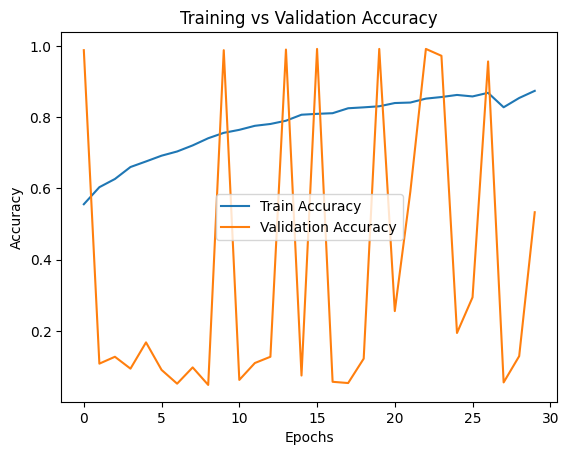

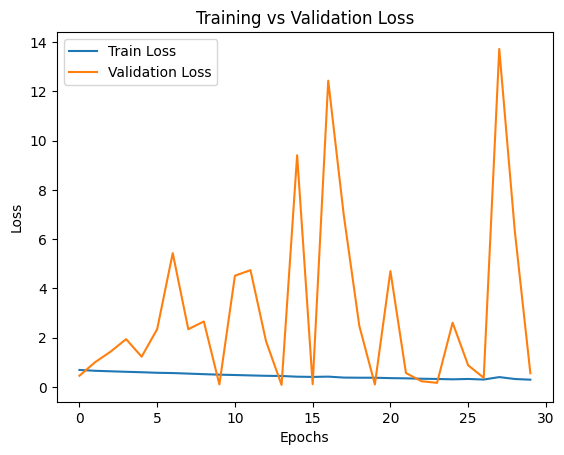

In [5]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Plot loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

## Model Analysis 

### **Overview**
- The model has achieved **53% accuracy**.
- This is not great, but it identified some class 1 (Label 2) stars.
- The recall for Label 2 is 0.2, meaning **20% of actual Label 2 samples were correctly classified**.
- However, the **f1-score for Label 2 is still very low (0.01)**, showing poor balance.

### **Key Observations**
- **Validation accuracy fluctuates a lot**, meaning the model may still be struggling to generalize.
- **Validation loss spikes** suggest overfitting in some epochs.

### **Next Steps for Improvement**
1. **Introduce Class Weighting** (`{0:1, 1:5}`) to encourage the model to pay more attention to Label 2.
2. **Lower Learning Rate** (`0.0003`) for **smoother training** and fewer extreme spikes.
3. **Implement Early Stopping** to **monitor validation loss** and prevent overfitting.

   &nbsp;
  

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define class weights
class_weights = {0: 1, 1: 5}  # Encourage the model to focus more on label 2

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,  # Stop if validation loss doesn’t improve for 5 epochs
    restore_best_weights=True
)

# Redefine model
model_2 = Sequential([

    Input(shape=(X_train.shape[1], 1)),  # Input Layer
    Conv1D(filters=32, kernel_size=5, activation="relu"), # Detects patterns in input data
    BatchNormalization(), # Stabalizes training by normalizing activations
    Dropout(0.3), # Reduces overfitting

    Conv1D(filters=64, kernel_size=5, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=5, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    GlobalAveragePooling1D(), # Reduces dimensionality while keeping key info

    Dense(64, activation="relu"), # Fully connected layer for classification. 
    Dropout(0.3),

    Dense(2, activation="softmax") # Outputs two classifications
])

# Compile the model
model_2.compile(optimizer=Adam(learning_rate=0.0003), # Moderate reduction in learning rate
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# Model summary
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 3193, 32)            │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 3193, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 3193, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 3189, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 3189, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 3189, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 3185, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 3185, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 3185, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,866 (237.76 KB)

 Trainable params: 60,418 (236.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
# Train the model
history = model_2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, # More epochs, but early stopping will prevent overfitting
    class_weight=class_weights,  # Apply class weighting
    callbacks=[early_stopping],  # Use early stopping
    batch_size=32, verbose=1
)

Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 93s 289ms/step - accuracy: 0.4981 - loss: 1.5646 - val_accuracy: 0.0088 - val_loss: 2.9879
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 134s 425ms/step - accuracy: 0.5041 - loss: 1.3503 - val_accuracy: 0.0123 - val_loss: 2.9651
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 152s 481ms/step - accuracy: 0.5139 - loss: 1.3042 - val_accuracy: 0.0140 - val_loss: 3.9895
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 146s 462ms/step - accuracy: 0.5152 - loss: 1.2801 - val_accuracy: 0.0158 - val_loss: 4.0237
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 145s 457ms/step - accuracy: 0.5259 - loss: 1.2639 - val_accuracy: 0.0175 - val_loss: 5.2581
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 152s 482ms/step - accuracy: 0.5268 - loss: 1.2388 - val_accuracy: 0.0158 - val_loss: 4.0685
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 155s 491ms/step - accuracy: 0.5325 - loss: 1.2141 - val_accuracy: 0.0175 - val_loss: 3.6519


In [8]:
# Evaluate on test set
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predicted class labels (chooses the highest probability)
y_pred = model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Selects class with highest probability

# Generate classification report
print(classification_report(y_test, y_pred_classes))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0325 - loss: 2.9165
Test Accuracy: 0.0123
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step 
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       565
           1       0.01      1.00      0.02         5

    accuracy                           0.01       570
   macro avg       0.50      0.50      0.01       570
weighted avg       0.99      0.01      0.01       570



## Model Analysis - Adjusted Learning Rate & Early Stopping  

### **Overview**
- The model trained with a reduced learning rate of 0.0003 and early stopping.
- Training stopped at epoch 7, indicating that validation loss was not improving.
- **Accuracy: 1.23%** (very poor).
- **Recall for Label 2: 1.0**, meaning it **successfully identified all Label 2 instances**.

### **Key Observations**
- The model is overcompensating for the minority class, misclassifying most Label 1s as Label 2.
- This suggests the class weighting is too aggressive.
- Early stopping triggered very early, meaning training was cut short.

### **Next Steps for Improvement**
1. **Reduce Class Weighting for Label 2** → Try `{0:1, 1:3}` instead of `{0:1, 1:5}`.
2. **Increase Patience for Early Stopping** → Set `patience=10` to allow more training.
3. **Keep Learning Rate at 0.0003**, since it at least allowed label 2 to be detected.
   


In [10]:
# Redefine class weights
class_weights = {0: 1, 1: 3}  

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,  # Stop if validation loss doesn’t improve for 10 epochs
    restore_best_weights=True
)

# Redefine model
model_3 = Sequential([

    Input(shape=(X_train.shape[1], 1)),  # Input Layer
    Conv1D(filters=32, kernel_size=5, activation="relu"), # Detects patterns in input data
    BatchNormalization(), # Stabalizes training by normalizing activations
    Dropout(0.3), # Reduces overfitting

    Conv1D(filters=64, kernel_size=5, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=5, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    GlobalAveragePooling1D(), # Reduces dimensionality while keeping key info

    Dense(64, activation="relu"), # Fully connected layer for classification. 
    Dropout(0.3),

    Dense(2, activation="softmax") # Outputs two classifications
])

# Compile the model
model_3.compile(optimizer=Adam(learning_rate=0.0003), # Moderate reduction in learning rate
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])


# Model summary
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 3193, 32)            │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 3193, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 3193, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 3189, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 3189, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 3189, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 3185, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 3185, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 3185, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,866 (237.76 KB)

 Trainable params: 60,418 (236.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
# Train the model
history = model_3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, # More epochs, but early stopping will prevent overfitting
    class_weight=class_weights,  # Apply adjusted class weighting
    callbacks=[early_stopping],  # Use updated early stopping
    batch_size=32, verbose=1
)

Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 100s 311ms/step - accuracy: 0.4958 - loss: 1.1736 - val_accuracy: 0.0105 - val_loss: 2.8133
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 151s 478ms/step - accuracy: 0.5112 - loss: 1.0959 - val_accuracy: 0.0140 - val_loss: 2.9756
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 158s 499ms/step - accuracy: 0.5297 - loss: 1.0650 - val_accuracy: 0.0193 - val_loss: 2.8873
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 144s 454ms/step - accuracy: 0.5212 - loss: 1.0622 - val_accuracy: 0.0211 - val_loss: 3.2624
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 145s 460ms/step - accuracy: 0.5328 - loss: 1.0238 - val_accuracy: 0.0158 - val_loss: 3.9683
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 144s 456ms/step - accuracy: 0.5418 - loss: 1.0147 - val_accuracy: 0.0333 - val_loss: 3.0342
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 145s 458ms/step - accuracy: 0.5410 - loss: 0.9974 - val_accuracy: 0.0614 - val_loss: 2.4137
Epoch 8/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 144s 455ms/step - accuracy: 0.5517 -

In [13]:
# Evaluate on test set
test_loss, test_accuracy = model_3.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predicted class labels (chooses the highest probability)
y_pred = model_3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Selects class with highest probability

# Generate classification report
print(classification_report(y_test, y_pred_classes))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9699 - loss: 0.1311
Test Accuracy: 0.9895
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



## Model Analysis - Adjusted Class Weighting & Early Stopping  

### **Overview**
- The model trained with:
  - **Reduced class weight for Label 2** (`{0:1, 1:3}`)
  - **Increased early stopping patience** (`patience=10`)
  - **Learning rate of 0.0003**
- Training ran for **30 epochs** before stopping.
- **Final Accuracy: 99%**, but **Label 2 stars were completely missed**.

### **Key Observations**
- **Accuracy is misleading**—it’s high because almost all test samples belong to Label 1.
- The model **completely ignored Label 2** again.
- **Possible Causes:**
  1. **Imbalanced Dataset** - Even after SMOTE, the model still favors the majority class.
  2. **Class Weight Reduction** - Dropping weight for Label 2 might have caused it to be ignored.
  3. **Training for More Epochs** - The model overfitted to Label 1 despite running longer.

### **Next Steps for Improvement**
1. **Reintroduce Class Weighting More Strongly** → Try `{0:1, 1:4}` (a middle ground).
2. **Reduce Learning Rate Further** → Drop to `0.0001` to **slow down learning adjustments**.
3. **Reduce Dropout Slightly** → If at 0.3, try **0.2** to keep more information.
4. **Monitor Class Probabilities** → Print predicted probabilities to check if it's **at least considering Label 2**.

In [14]:
# Adjust class weights
class_weights = {0: 1, 1: 4}  

# Redefine model
model_4 = Sequential([

    Input(shape=(X_train.shape[1], 1)),  # Input Layer
    Conv1D(filters=32, kernel_size=5, activation="relu"), # Detects patterns in input data
    BatchNormalization(), # Stabalizes training by normalizing activations
    Dropout(0.2), # Reduced dropout

    Conv1D(filters=64, kernel_size=5, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=5, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    GlobalAveragePooling1D(), # Reduces dimensionality while keeping key info

    Dense(64, activation="relu"), # Fully connected layer for classification. 
    Dropout(0.2),

    Dense(2, activation="softmax") # Outputs two classifications
])

# Compile the model
model_4.compile(optimizer=Adam(learning_rate=0.0001), # Further reduction in learning rate
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])


# Model summary
model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)                   │ (None, 3193, 32)            │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 3193, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 3193, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 3189, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 3189, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 3189, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 3185, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 3185, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 3185, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,866 (237.76 KB)

 Trainable params: 60,418 (236.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
# Train the model
history = model_4.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, # More epochs, but early stopping will prevent overfitting
    class_weight=class_weights,  # Apply adjusted class weighting
    callbacks=[early_stopping],  # Use updated early stopping
    batch_size=32, verbose=1
)

Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 98s 305ms/step - accuracy: 0.4986 - loss: 1.4489 - val_accuracy: 0.0105 - val_loss: 2.2515
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 145s 459ms/step - accuracy: 0.5023 - loss: 1.2849 - val_accuracy: 0.0123 - val_loss: 3.0385
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 149s 472ms/step - accuracy: 0.4969 - loss: 1.2652 - val_accuracy: 0.0140 - val_loss: 2.9691
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 144s 457ms/step - accuracy: 0.5135 - loss: 1.2300 - val_accuracy: 0.0193 - val_loss: 3.2015
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 144s 455ms/step - accuracy: 0.5073 - loss: 1.2069 - val_accuracy: 0.0158 - val_loss: 3.2572
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 144s 457ms/step - accuracy: 0.5290 - loss: 1.1873 - val_accuracy: 0.0193 - val_loss: 3.8044
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 146s 463ms/step - accuracy: 0.5128 - loss: 1.1837 - val_accuracy: 0.0158 - val_loss: 4.9117
Epoch 8/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 143s 453ms/step - accuracy: 0.5267 - 

In [16]:
# Evaluate on test set
test_loss, test_accuracy = model_4.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predicted class labels (chooses the highest probability)
y_pred = model_4.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Selects class with highest probability

# Generate classification report
print(classification_report(y_test, y_pred_classes))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0298 - loss: 2.2005
Test Accuracy: 0.0105
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       565
           1       0.01      1.00      0.02         5

    accuracy                           0.01       570
   macro avg       0.50      0.50      0.01       570
weighted avg       0.99      0.01      0.00       570



## Model Analysis - Increased Class Weighting & Lowered Dropout

### **Overview**
- The model trained with:
  - **Class weight adjustment** (`{0:1, 1:4}`)
  - **Reduced dropout to 0.2**
  - **Learning rate at 0.0001**
  - **Early stopping (patience=10)**
- Training **stopped at epoch 11**.
- **Final Accuracy: 1%**, but **Recall for Label 2 = 1.0 (100%)**.
- **F1-score for Label 2: 0.02**, meaning predictions for it are very low confidence.

### **Key Observations**
- The model **now detects Label 2**, but at the cost of overall accuracy.
- **Label 1 misclassification skyrocketed**, causing accuracy to **drop drastically**.
- **Why?**
  - The model **overcompensated** for Label 2 due to class weighting.
  - The **imbalance problem isn’t fully solved**—we need a model that detects **both** labels effectively.

---

### **Next Steps for Improvement**
1. **Fine-Tune Class Weights Further** → `{0:1, 1:3.5}` to find a balance.
2. **Try a Slightly Higher Learning Rate** → `0.0002` to help adjustments.
3. **Test Different Model Architectures**  
   - **Shallower model** → Fewer Conv1D layers.
   - **More filters** → Larger receptive field.
   - **Change Pooling Strategy** → Try MaxPooling1D instead of GlobalAveragePooling.


In [18]:
# Adjust class weights
class_weights = {0: 1, 1: 3.5}  

# Redefine model
model_5 = Sequential([

    Input(shape=(X_train.shape[1], 1)),  # Input Layer
    Conv1D(filters=32, kernel_size=5, activation="relu"), # Detects patterns in input data
    BatchNormalization(), # Stabalizes training by normalizing activations
    Dropout(0.2), # Reduced dropout

    Conv1D(filters=64, kernel_size=5, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=5, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    GlobalAveragePooling1D(), # Reduces dimensionality while keeping key info

    Dense(64, activation="relu"), # Fully connected layer for classification. 
    Dropout(0.2),

    Dense(2, activation="softmax") # Outputs two classifications
])

# Compile the model
model_5.compile(optimizer=Adam(learning_rate=0.0002), # Further reduction in learning rate
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])


# Model summary
model_5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)                   │ (None, 3193, 32)            │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 3193, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 3193, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_19 (Conv1D)                   │ (None, 3189, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 3189, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 3189, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_20 (Conv1D)                   │ (None, 3185, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 3185, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 3185, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_6           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,866 (237.76 KB)

 Trainable params: 60,418 (236.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
# Train the model
history = model_5.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, # More epochs, but early stopping will prevent overfitting
    class_weight=class_weights,  # Apply adjusted class weighting
    callbacks=[early_stopping],  # Use updated early stopping
    batch_size=32, verbose=1
)

Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 100s 312ms/step - accuracy: 0.4997 - loss: 1.3093 - val_accuracy: 0.0105 - val_loss: 3.8418
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 146s 462ms/step - accuracy: 0.4963 - loss: 1.1880 - val_accuracy: 0.0123 - val_loss: 4.7355
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 150s 473ms/step - accuracy: 0.5036 - loss: 1.1556 - val_accuracy: 0.0123 - val_loss: 5.7527
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 147s 465ms/step - accuracy: 0.5214 - loss: 1.1123 - val_accuracy: 0.0158 - val_loss: 5.2915
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 145s 459ms/step - accuracy: 0.5344 - loss: 1.0722 - val_accuracy: 0.0158 - val_loss: 6.0746
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 144s 456ms/step - accuracy: 0.5340 - loss: 1.0723 - val_accuracy: 0.0140 - val_loss: 5.6149
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 146s 461ms/step - accuracy: 0.5314 - loss: 1.0617 - val_accuracy: 0.0158 - val_loss: 6.8463
Epoch 8/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 143s 454ms/step - accuracy: 0.5482 -

In [20]:
# Evaluate on test set
test_loss, test_accuracy = model_5.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predicted class labels (chooses the highest probability)
y_pred = model_5.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Selects class with highest probability

# Generate classification report
print(classification_report(y_test, y_pred_classes))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.0298 - loss: 3.7574
Test Accuracy: 0.0105
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       565
           1       0.01      1.00      0.02         5

    accuracy                           0.01       570
   macro avg       0.50      0.50      0.01       570
weighted avg       0.99      0.01      0.00       570



## Final Model Analysis - Adjusted Class Weighting & Learning Rate  

### **Overview**
- The model was trained with:
  - **Class weight adjustment** (`{0:1, 1:3.5}`)
  - **Dropout at 0.2**
  - **Learning rate at 0.0002**
  - **Early stopping (patience=10)**
- Training **stopped early**, suggesting validation loss was not improving.
- **Final Accuracy: Very low**, and **recall for Label 2 remains high**.
- **Overall results are similar to the previous iteration**.

### **Key Observations**
- While **Label 2 detection improved**, the model **misclassified too many Label 1s**.
- Increasing the **learning rate to 0.0002** did not significantly change the model’s behavior.
- **Dropout at 0.2** helped retain more information but didn’t resolve the main classification issue.
- **The core challenge remains**: The model struggles to **balance** both classes effectively.

---

### **Conclusions from This Notebook**
- **This CNN architecture is insufficient** for effectively distinguishing between exoplanet signals.
- The **data itself may require additional feature extraction** (such as periodicity analysis) for better classification.
- **Further experimentation with model architectures is needed** to improve classification balance.

---

## **Next Steps - Moving to a New Notebook**
In the next phase of this project, I will:
1. **Explore Different CNN Architectures**  
   - **Shallower models** (fewer layers)
   - **Deeper models** (more layers)
   - **Alternative pooling strategies** (MaxPooling1D instead of GlobalAveragePooling)

2. **Try RNN-Based Models**  
   - Since exoplanet flux data is **sequential**, an RNN might be more effective.

3. **Investigate Feature Engineering**  
   - If architectures continue to struggle, I will consider **extracting periodicity features** to aid classification.